<a href="https://colab.research.google.com/github/bala-codes/NEWS-CATEGORY-CLASSIFIER-USING-MACHINE-LEARNING-NLP/blob/master/codes/1.%20News%20Category%20Classifier%20Training%20and%20Testing.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# IF YOU ARE USING GOOGLE COLABORATORY AND IF YOUR DATA IS STORED IN GOOGLE DRIVE, THEN RUN THIS CODE OTHERWISE DON'T EXECUTE

from google.colab import drive
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [ ]:
#Importing the libraries which are required.
import pandas as pd
import nltk
from nltk.corpus import stopwords
import string
import matplotlib.pyplot as plt
%matplotlib inline

In [ ]:
nltk.download('stopwords')
nltk.download('wordnet')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Unzipping corpora/wordnet.zip.


True

#  HERE I AM USING MY OWN CSV FILE, IF YOU HAVE YOU OWN FILE (.CSV) FORMAT , GIVE THE BELOW DF INPUT AS YOUR FILE INPUT.

In [ ]:
df = pd.read_excel('/content/gdrive/My Drive/Machine Learning Projects/NEWS CATEGORY CLASSIFIER PROJECT/data_both_train_test.xlsx') # If you have your input file as .xlsx (excel sheet) format
#df = pd.read_csv('/content/gdrive/My Drive/Machine Learning Projects/FAKE VS REAL NEWS CATEGORY CLASSIFIER PROJECT/fakerealnews.csv') # If you have your input file as .csv format
df = pd.DataFrame(df)
df.head()

,STORY,SECTION
0,But the most painful was the huge reversal in ...,3
1,How formidable is the opposition alliance amon...,0
2,Most Asian currencies were trading lower today...,3
3,"If you want to answer any question, click on ‘...",1
4,"In global markets, gold prices edged up today ...",3


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10376 entries, 0 to 10375
Data columns (total 2 columns):
STORY      10376 non-null object
SECTION    10376 non-null int64
dtypes: int64(1), object(1)
memory usage: 162.2+ KB


In [ ]:
df.shape

(10376, 2)

In [ ]:
df.groupby("SECTION").describe()

STORY                                                               
        count unique                                                top freq
SECTION                                                                     
0        2117   2102  This story has been published from a wire agen...    4
1        3975   3912  This story has been published from a wire agen...   13
2        2723   2710  The consensus reads, “Exciting, entertaining, ...    3
3        1561   1536  This story has been published from a wire agen...   17

# IF YOU DON'T SEE ANY VERTICAL BAR IN THE BELOW GRAPH, THEN YOU DON'T HAVE ANY MISSING VALUES IN ANY OF THE FIELDS

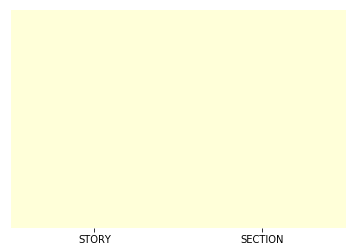

In [ ]:
import seaborn as sns
sns.heatmap(df.isnull(),yticklabels=False,cbar=False,cmap='YlGnBu')

# HERE WE DROP ALL THE DUPLICATES ROWS IF EXISTS IN THE DATAFRAME

In [ ]:
df.drop_duplicates(inplace = True)
df.dropna(inplace=True)

In [ ]:
df = pd.DataFrame(df)


In [ ]:
def word_count(sentence):
  return len(sentence.split())

df['word count'] = df['STORY'].apply(word_count)
df.head()

,STORY,SECTION,word count
0,But the most painful was the huge reversal in ...,3,148
1,How formidable is the opposition alliance amon...,0,17
2,Most Asian currencies were trading lower today...,3,58
3,"If you want to answer any question, click on ‘...",1,103
4,"In global markets, gold prices edged up today ...",3,46


In [ ]:
import matplotlib.pyplot as plt
w = df['word count'][df.SECTION == 0]
x = df['word count'][df.SECTION == 1]
y = df['word count'][df.SECTION == 2]
z = df['word count'][df.SECTION == 3]

x.head()

3     103
5      59
10    227
12     60
13    129
Name: word count, dtype: int64

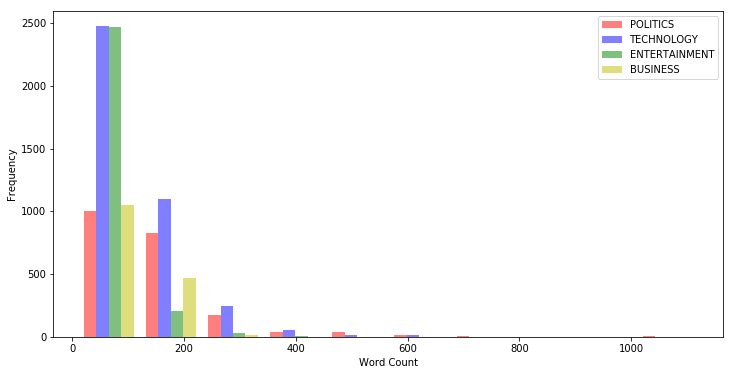

In [ ]:
# Plotting the word count distribution for both FAKE and REAL news
plt.figure(figsize = (12,6))
plt.xlabel('Word Count')
plt.ylabel('Frequency')
g =plt.hist([w, x, y, z],color = ['r','b','g','y'], alpha = 0.5,label = ['POLITICS','TECHNOLOGY', 'ENTERTAINMENT', 'BUSINESS'])
plt.legend(loc = 'upper right')
plt.show()

# THE BELOW SET OF FUNCTIONS CLEANS YOUR CODE . I.E FROM PUNCTUATION REMOVAL , STOPWORDS REMOVAL , STEMMING PROCESS , LEMMATIZATION PROCESS

In [ ]:
all_punctuations = string.punctuation + '‘’,:”][],' 

def punc_remover(raw_text):
    no_punct = "".join([i for i in raw_text if i not in all_punctuations])
    return no_punct

In [ ]:
def stopword_remover(no_punc_text):
    words = no_punc_text.split()
    no_stp_words = " ".join([i for i in words if i not in stopwords.words('english')])
    return no_stp_words

In [ ]:
lemmer = nltk.stem.WordNetLemmatizer()
def lem(words):
    return " ".join([lemmer.lemmatize(word,'v') for word in words.split()])

In [ ]:
def text_cleaner(raw):
    cleaned_text = stopword_remover(punc_remover(raw))
    return lem(cleaned_text)

In [ ]:
%%time

df['SECTION_CLEANED'] = df['STORY'].apply(text_cleaner)


CPU times: user 2min 11s, sys: 14.9 s, total: 2min 26s
Wall time: 2min 26s


In [ ]:
# SAVE THE FINAL CLEANED COPY IF YOU WANT 
#df.to_excel("output.xlsx") 

# SAVE THE FINAL CLEANED COPY IF YOU WANT 
df.to_csv("/content/gdrive/My Drive/Machine Learning Projects/NEWS CATEGORY CLASSIFIER PROJECT/News Category Predictor - Source Codes/dfnewscategorycleaned.csv")  # SAVE THE FINAL CLEANED COPY IF YOU WANT 

df.head()


,STORY,SECTION,word count,SECTION_CLEANED
0,But the most painful was the huge reversal in ...,3,148,But painful huge reversal fee income unheard a...
1,How formidable is the opposition alliance amon...,0,17,How formidable opposition alliance among Congr...
2,Most Asian currencies were trading lower today...,3,58,Most Asian currencies trade lower today South ...
3,"If you want to answer any question, click on ‘...",1,103,If want answer question click Answer After cli...
4,"In global markets, gold prices edged up today ...",3,46,In global market gold price edge today disappo...


In [ ]:
df = pd.read_csv("/content/gdrive/My Drive/Machine Learning Projects/NEWS CATEGORY CLASSIFIER PROJECT/News Category Predictor - Source Codes/dfnewscategorycleaned.csv")  # SAVE THE FINAL CLEANED COPY IF YOU WANT 

df = pd.DataFrame(df)
df.head()

,Unnamed: 0,STORY,SECTION,word count,SECTION_CLEANED
0,0,But the most painful was the huge reversal in ...,3,148,But painful huge reversal fee income unheard a...
1,1,How formidable is the opposition alliance amon...,0,17,How formidable opposition alliance among Congr...
2,2,Most Asian currencies were trading lower today...,3,58,Most Asian currencies trade lower today South ...
3,3,"If you want to answer any question, click on ‘...",1,103,If want answer question click Answer After cli...
4,4,"In global markets, gold prices edged up today ...",3,46,In global market gold price edge today disappo...


In [ ]:
# Displaying the most common words in the dataset
import collections
#from counter import Counter

df['SECTION_CLEANED'] = df['SECTION_CLEANED'].astype(str)
all_words = []

for line in list(df['SECTION_CLEANED']):
  words = line.split()
  for word in words:
    all_words.append(word.lower())

collections.Counter(all_words).most_common(10)

[('the', 10118),
 ('say', 6198),
 ('also', 3604),
 ('new', 2705),
 ('party', 2544),
 ('india', 2478),
 ('make', 2409),
 ('company', 2212),
 ('congress', 2102),
 ('it', 2019)]

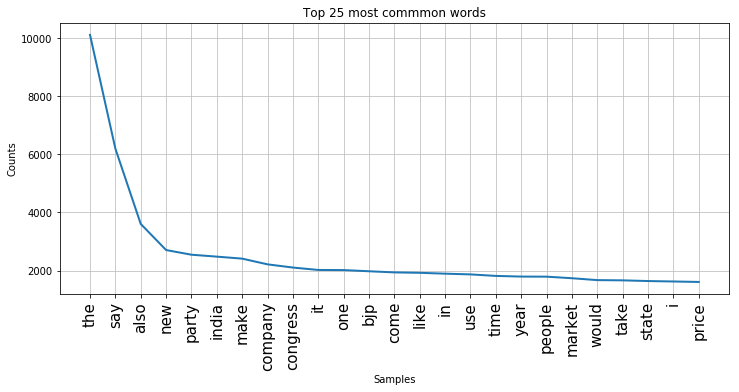

In [ ]:
#Plotting the word frequency distribution of first couple of words

plt.figure(figsize=(12,5))
plt.title('Top 25 most commmon words')
plt.xticks(fontsize=15,rotation=90)
fd = nltk.FreqDist(all_words)
fd.plot(25)


In [ ]:
#!pip install WordCloud

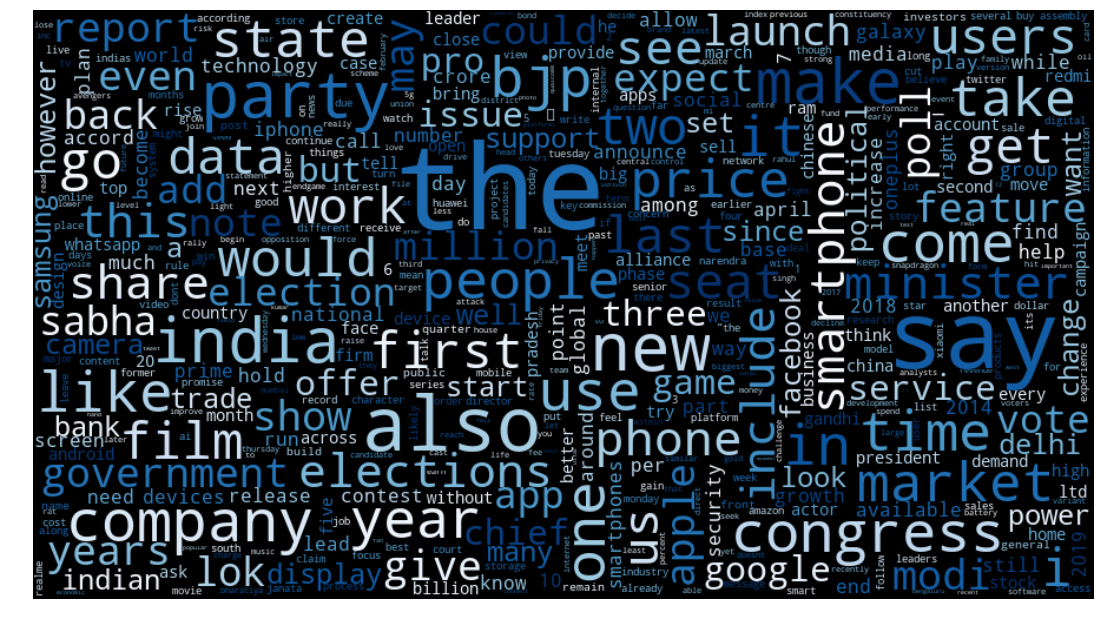

In [ ]:
# Creating a word Cloud
from wordcloud import WordCloud
import collections

all_words = []

for line in list(df['SECTION_CLEANED']):
  words = line.split()
  for word in words:
    all_words.append(word.lower())

wordfreq = collections.Counter(all_words)
wordcloud = WordCloud(width=900,height=500, max_words=500, max_font_size=100, relative_scaling=0.5, colormap='Blues',
                      normalize_plurals = True).generate_from_frequencies(wordfreq)

plt.figure(figsize=(19,15))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

In [ ]:
df = pd.DataFrame(df)

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(df['SECTION_CLEANED'],df['SECTION'],test_size=0.15,random_state=87) # rs = 77(88)

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer
count_vectorizer = CountVectorizer(stop_words = "english")
count_train = count_vectorizer.fit_transform(X_train.values)
count_test = count_vectorizer.transform(X_test.values)

In [ ]:
print(count_train)
print('\n')
print("feature_names",count_vectorizer.get_feature_names()[:10])

  (0, 2584)	1
  (0, 32311)	1
  (0, 14274)	1
  (0, 32508)	1
  (0, 14001)	2
  (0, 32473)	2
  (0, 25046)	1
  (0, 21856)	4
  (0, 9856)	2
  (0, 8430)	1
  (0, 9883)	1
  (0, 4534)	1
  (0, 16842)	2
  (0, 3753)	1
  (0, 35063)	3
  (0, 14734)	1
  (0, 2431)	1
  (0, 8591)	1
  (0, 15723)	1
  (0, 21926)	2
  (0, 28182)	1
  (0, 5941)	1
  (0, 18373)	2
  (0, 35064)	1
  (0, 35432)	1
  :	:
  (8720, 36813)	1
  (8720, 5560)	1
  (8720, 4976)	1
  (8720, 36767)	1
  (8720, 13771)	1
  (8720, 36952)	2
  (8720, 22418)	1
  (8720, 28897)	1
  (8720, 8912)	1
  (8720, 1252)	1
  (8720, 35618)	1
  (8720, 11953)	1
  (8720, 1248)	1
  (8720, 22424)	1
  (8720, 13976)	1
  (8720, 11575)	1
  (8720, 18309)	1
  (8720, 31349)	1
  (8720, 25874)	1
  (8720, 9407)	1
  (8720, 13975)	1
  (8720, 13232)	1
  (8720, 35389)	1
  (8720, 6363)	1
  (8720, 10634)	1


feature_names ['00', '000', '00000', '0001', '0003', '0004', '0006', '0007', '0009', '001']


In [ ]:
# Import TfidfVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer

tfidf_vectorizer = TfidfVectorizer(stop_words='english', max_df=0.7)
tfidf_train = tfidf_vectorizer.fit(X_train.values)
tfidf_train = tfidf_vectorizer.transform(X_train.values)

tfidf_test = tfidf_vectorizer.transform(X_test)
print(tfidf_train)
#this command gives importance for each and every word
print(tfidf_train[0:3])


  (0, 36376)	0.07351183074852452
  (0, 36085)	0.07667574691733799
  (0, 35432)	0.06566130361007723
  (0, 35064)	0.11596369024671047
  (0, 35063)	0.32218446354986996
  (0, 34624)	0.0783264973659388
  (0, 34367)	0.05341773247048105
  (0, 33154)	0.04615135801202608
  (0, 32508)	0.11596369024671047
  (0, 32473)	0.09178490589804869
  (0, 32311)	0.0857707492084082
  (0, 32044)	0.06006414201814678
  (0, 30917)	0.11596369024671047
  (0, 30750)	0.04520721501679707
  (0, 30584)	0.11095122317101987
  (0, 30459)	0.0639841662466475
  (0, 30184)	0.04980330340907942
  (0, 29676)	0.0786243976820927
  (0, 28942)	0.16337642798605714
  (0, 28901)	0.07477009537820892
  (0, 28798)	0.07255303531006799
  (0, 28182)	0.11596369024671047
  (0, 28119)	0.23192738049342093
  (0, 28096)	0.09488914273617119
  (0, 27095)	0.08813262465653153
  :	:
  (8720, 31349)	0.18165529294874513
  (8720, 28897)	0.10611305315247155
  (8720, 26777)	0.21388177050641716
  (8720, 25874)	0.22002848389796137
  (8720, 22424)	0.19481316110

In [1]:
'''tfidf_vectorizer = TfidfVectorizer(analyzer='word',stop_words="english",lowercase = True)
tfidf_vectorizer.fit_transform(X_train.values.tolist())'''

all_words = []
print(tfidf_vectorizer.vocabulary_)
for k,v in (tfidf_vectorizer.vocabulary_).items():
  all_words.append(k)


wordfreq = collections.Counter(all_words)
wordcloud = WordCloud(width=900,height=500, max_words=500, max_font_size=100, relative_scaling=0.5, colormap='Blues',
                      normalize_plurals = True).generate_from_frequencies(wordfreq)

plt.figure(figsize=(19,15))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

'tfidf_vectorizer = TfidfVectorizer(analyzer=\'word\',stop_words="english",lowercase = True)\ntfidf_vectorizer.fit_transform(X_train.values.tolist())\n\nall_words = []\nprint(tfidf_vectorizer.vocabulary_)\nfor k,v in (tfidf_vectorizer.vocabulary_).items():\n  all_words.append(k)\n\n\nwordfreq = collections.Counter(all_words)\nwordcloud = WordCloud(width=900,height=500, max_words=500, max_font_size=100, relative_scaling=0.5, colormap=\'Blues\',\n                      normalize_plurals = True).generate_from_frequencies(wordfreq)\n\nplt.figure(figsize=(19,15))\nplt.imshow(wordcloud, interpolation=\'bilinear\')\nplt.axis(\'off\')\nplt.show()'

In [ ]:
len(tfidf_vectorizer.vocabulary_)

37732

# In the next code , kindly check the alpha values for which you get more accuracy and provide that accuracy in the hyperparameter section of our Naive Bayes model

# NAIVE BAYES CLASSIFIER

In [ ]:
#USING NAIVE BAYES MODEL TO PREDICT ON TFIDFVECTORIZER CALCULATED VALUES

from sklearn.naive_bayes import MultinomialNB
from sklearn import metrics

nb_classifier = MultinomialNB(alpha=0.1)

nb_classifier.fit(tfidf_train,y_train)
pred = nb_classifier.predict(tfidf_test)

# Calculate the accuracy score: score
score = metrics.accuracy_score(y_test,pred)
print("Score from TFIDF Vectorizer", round(score*100,3) ,"%")

# Calculate the confusion matrix: cm
cm = metrics.confusion_matrix(y_test,pred, labels=[0,1,2,3])
print(cm)

Score from TFIDF Vectorizer 97.531 %
[[305   7   6   0]
 [  3 590   5   4]
 [  3   6 387   0]
 [  1   3   0 219]]


In [ ]:
# Create the list of alphas: alphas for tfidf
import numpy as np

alphas = np.arange(0, 1, 0.1)

# Define train_and_predict()
def train_and_predict(alpha):

    nb_classifier = MultinomialNB(alpha=alpha)
    nb_classifier.fit(tfidf_train, y_train)
    pred = nb_classifier.predict(tfidf_test)
    score = metrics.accuracy_score(y_test, pred)
    return score

# Iterate over the alphas and print the corresponding score
for alpha in alphas:
    print('Alpha: ', alpha)
    print('Score: ', train_and_predict(alpha))
    print()
    

Alpha:  0.0
Score:  0.9662118258609487

Alpha:  0.1
Score:  0.9753086419753086

Alpha:  0.2
Score:  0.9740090968161144

Alpha:  0.30000000000000004
Score:  0.9740090968161144

Alpha:  0.4
Score:  0.9714100064977258

Alpha:  0.5
Score:  0.96816114359974

Alpha:  0.6000000000000001
Score:  0.9655620532813515

Alpha:  0.7000000000000001
Score:  0.9623131903833658

Alpha:  0.8
Score:  0.9577647823261858

Alpha:  0.9
Score:  0.9558154645873944



/usr/local/lib/python3.6/dist-packages/sklearn/naive_bayes.py:485: UserWarning: alpha too small will result in numeric errors, setting alpha = 1.0e-10
  'setting alpha = %.1e' % _ALPHA_MIN)


# Bernoulli's Bayes

In [ ]:
#USING Bernoulli BAYES MODEL TO PREDICT ON TFIDFVECTORIZER CALCULATED VALUES

from sklearn.naive_bayes import BernoulliNB
from sklearn import metrics

bb_classifier = BernoulliNB(alpha=0.1)

#bb_classifier.fit(count_train,y_train)
#pred = bb_classifier.predict(count_test)

bb_classifier.fit(tfidf_train,y_train)
pred = bb_classifier.predict(tfidf_test)

# Calculate the accuracy score: score
score = metrics.accuracy_score(y_test,pred)
print("Score from TFIDF Vectorizer", round(score*100,3) ,"%")

# Calculate the confusion matrix: cm
cm = metrics.confusion_matrix(y_test,pred, labels=[0,1,2,3])
print(cm)

Score from TFIDF Vectorizer 96.686 %
[[298   7  11   2]
 [  3 578  14   7]
 [  2   2 392   0]
 [  1   2   0 220]]


In [ ]:
# Create the list of alphas: alphas for tfidf
import numpy as np

alphas = np.arange(0, 1, 0.1)

# Define train_and_predict()
def train_and_predict(alpha):

    bb_classifier = BernoulliNB(alpha=alpha)
    bb_classifier.fit(tfidf_train, y_train)
    pred = bb_classifier.predict(tfidf_test)
    score = metrics.accuracy_score(y_test, pred)
    return score

# Iterate over the alphas and print the corresponding score
for alpha in alphas:
    print('Alpha: ', alpha)
    print('Score: ', train_and_predict(alpha))
    print()

Alpha:  0.0
Score:  0.9655620532813515

Alpha:  0.1
Score:  0.9668615984405458

Alpha:  0.2
Score:  0.9642625081221572

Alpha:  0.30000000000000004
Score:  0.9597141000649773

Alpha:  0.4
Score:  0.9577647823261858

Alpha:  0.5
Score:  0.9545159194282001

Alpha:  0.6000000000000001
Score:  0.9551656920077972

Alpha:  0.7000000000000001


/usr/local/lib/python3.6/dist-packages/sklearn/naive_bayes.py:485: UserWarning: alpha too small will result in numeric errors, setting alpha = 1.0e-10
  'setting alpha = %.1e' % _ALPHA_MIN)


Score:  0.9538661468486029

Alpha:  0.8
Score:  0.9532163742690059

Alpha:  0.9
Score:  0.9506172839506173



# PASSIVE AGGRESSIVE CLASSIFIER

In [ ]:
#USING PASSIVE AGGRESSIVE MODEL TO PREDICT ON TFIDFVECTORIZER CALCULATED VALUES

from sklearn.linear_model import PassiveAggressiveClassifier
from sklearn import metrics

PA_classifier = PassiveAggressiveClassifier(max_iter=350)

PA_classifier.fit(tfidf_train,y_train)
pred = PA_classifier.predict(tfidf_test)

#PA_classifier.fit(count_train,y_train)
#pred = PA_classifier.predict(count_test)

# Calculate the accuracy score: score
score = metrics.accuracy_score(y_test,pred)
print("Score from TFIDF Vectorizer", round(score*100,3) ,"%")

# Calculate the confusion matrix: cm
cm = metrics.confusion_matrix(y_test,pred, labels=[0,1,2,3])
print(cm)

Score from TFIDF Vectorizer 97.596 %
[[302   7   8   1]
 [  4 588   7   3]
 [  2   0 394   0]
 [  1   4   0 218]]


In [ ]:
# Create the list of alphas: alphas for tfidf
import numpy as np

alphas = [50,100,150,200,250,300,350,400,450,500,600,700,800,900,1000]

# Define train_and_predict()
def train_and_predict(alpha):

    PA_classifier = PassiveAggressiveClassifier(max_iter=alpha)
    PA_classifier.fit(tfidf_train, y_train)
    pred = PA_classifier.predict(tfidf_test)
    score = metrics.accuracy_score(y_test, pred)
    return score

# Iterate over the alphas and print the corresponding score
for alpha in alphas:
    print('Alpha: ', alpha)
    print('Score: ', train_and_predict(alpha))
    print()

Alpha:  50
Score:  0.9740090968161144

Alpha:  100
Score:  0.9759584145549057

Alpha:  150
Score:  0.9766081871345029

Alpha:  200
Score:  0.9766081871345029

Alpha:  250
Score:  0.9753086419753086

Alpha:  300
Score:  0.9740090968161144

Alpha:  350
Score:  0.9759584145549057

Alpha:  400
Score:  0.9766081871345029

Alpha:  450
Score:  0.9772579597141

Alpha:  500
Score:  0.9766081871345029

Alpha:  600
Score:  0.9759584145549057

Alpha:  700
Score:  0.9759584145549057

Alpha:  800
Score:  0.9753086419753086

Alpha:  900
Score:  0.9759584145549057

Alpha:  1000
Score:  0.9766081871345029



# SGD CLASSIFIER

In [ ]:
#USING SGD MODEL TO PREDICT ON TFIDFVECTORIZER CALCULATED VALUES

from sklearn.linear_model import SGDClassifier
from sklearn import metrics

SGD_classifier = SGDClassifier()

SGD_classifier.fit(tfidf_train,y_train)
pred = SGD_classifier.predict(tfidf_test)

#SGD_classifier.fit(count_train,y_train)
#pred = SGD_classifier.predict(count_test)

# Calculate the accuracy score: score
score = metrics.accuracy_score(y_test,pred)
print("Score from TFIDF Vectorizer", round(score*100,3) ,"%")

# Calculate the confusion matrix: cm
cm = metrics.confusion_matrix(y_test,pred, labels=[0,1,2,3])
print(cm)

Score from TFIDF Vectorizer 97.726 %
[[304   7   7   0]
 [  3 589   7   3]
 [  2   0 394   0]
 [  1   4   1 217]]


# SUPPORT VECTOR MACHINES

In [ ]:
#USING SGD MODEL TO PREDICT ON TFIDFVECTORIZER CALCULATED VALUES

from sklearn.svm import LinearSVC
from sklearn import metrics

SVC_classifier = LinearSVC()

SVC_classifier.fit(tfidf_train,y_train)
pred = SVC_classifier.predict(tfidf_test)

#SVC_classifier.fit(count_train,y_train)
#pred = SVC_classifier.predict(count_test)

# Calculate the accuracy score: score
score = metrics.accuracy_score(y_test,pred)
print("Score from TFIDF Vectorizer", round(score*100,3) ,"%")

# Calculate the confusion matrix: cm
cm = metrics.confusion_matrix(y_test,pred, labels=[0,1,2,3])
print(cm)

Score from TFIDF Vectorizer 97.661 %
[[304   7   7   0]
 [  3 588   8   3]
 [  2   0 394   0]
 [  1   3   2 217]]


# LOGISTIC REGRESSION

In [ ]:
from sklearn.linear_model import LogisticRegression

logreg_classifier = LogisticRegression(C=1000)

logreg_classifier.fit(tfidf_train,y_train)
pred = logreg_classifier.predict(tfidf_test)

#logreg_classifier.fit(count_train,y_train)
#pred = logreg_classifier.predict(count_test)

# Calculate the accuracy score: score
score = metrics.accuracy_score(y_test,pred)
print("Score from TFIDF Vectorizer", round(score*100,3) ,"%")

# Calculate the confusion matrix: cm
cm = metrics.confusion_matrix(y_test,pred, labels=[0,1,2,3])
print(cm)

/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


Score from TFIDF Vectorizer 97.661 %
[[303   7   8   0]
 [  3 589   7   3]
 [  2   0 394   0]
 [  1   3   2 217]]


In [ ]:
import numpy as np

C = [0.001, 0.01, 0.1, 1, 10, 100, 1000]

# Define train_and_predict()
def train_and_predict(C):

    logreg_classifier = LogisticRegression(C=C)
    logreg_classifier.fit(tfidf_train, y_train)
    pred = logreg_classifier.predict(tfidf_test)
    score = metrics.accuracy_score(y_test, pred)
    return score

# Iterate over the alphas and print the corresponding score
for c in C:
    print('C value: ', c)
    print('Score: ', train_and_predict(c))
    print()

C value:  0.001


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


Score:  0.39116309291747886

C value:  0.01
Score:  0.4730344379467186

C value:  0.1
Score:  0.9330734243014944

C value:  1
Score:  0.9655620532813515

C value:  10
Score:  0.9740090968161144

C value:  100
Score:  0.9766081871345029

C value:  1000
Score:  0.9766081871345029



# Logistic Regression CV

In [ ]:
from sklearn.linear_model import LogisticRegressionCV

logregcv_classifier = LogisticRegressionCV(Cs=100)

logregcv_classifier.fit(tfidf_train,y_train)
pred = logregcv_classifier.predict(tfidf_test)

#logregcv_classifier.fit(count_train,y_train)
#pred = logregcv_classifier.predict(count_test)

# Calculate the accuracy score: score
score = metrics.accuracy_score(y_test,pred)
print("Score from TFIDF Vectorizer", round(score*100,3) ,"%")

# Calculate the confusion matrix: cm
cm = metrics.confusion_matrix(y_test,pred, labels=[0,1,2,3])
print(cm)

/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:947: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:947: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)


Score from TFIDF Vectorizer 97.531 %
[[302   7   9   0]
 [  3 588  10   1]
 [  2   0 394   0]
 [  1   3   2 217]]


In [ ]:
import numpy as np

C = [1, 10, 50, 75, 100]

# Define train_and_predict()
def train_and_predict(C):

    logregcv_classifier = LogisticRegressionCV(Cs=C)
    logregcv_classifier.fit(tfidf_train, y_train)
    pred = logregcv_classifier.predict(tfidf_test)
    score = metrics.accuracy_score(y_test, pred)
    return score

# Iterate over the alphas and print the corresponding score
for c in C:
    print('C value: ', c)
    print('Score: ', train_and_predict(c))
    print()

C value:  1


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)


Score:  0.39116309291747886

C value:  10


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:947: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:947: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:947: ConvergenceWarning: lbfgs failed to conve

Score:  0.9759584145549057

C value:  50


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:947: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)


Score:  0.9753086419753086

C value:  75


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:947: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:947: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)


Score:  0.9753086419753086

C value:  100


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:947: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:947: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)


Score:  0.9753086419753086



# Random Forest Classifier

In [ ]:
from sklearn.ensemble import RandomForestClassifier

rf_classifier = RandomForestClassifier(n_estimators=400)

rf_classifier.fit(tfidf_train,y_train)
pred = rf_classifier.predict(tfidf_test)

#logregcv_classifier.fit(count_train,y_train)
#pred = logregcv_classifier.predict(count_test)

# Calculate the accuracy score: score
score = metrics.accuracy_score(y_test,pred)
print("Score from TFIDF Vectorizer", round(score*100,3) ,"%")

# Calculate the confusion matrix: cm
cm = metrics.confusion_matrix(y_test,pred, labels=[0,1,2,3])
print(cm)

Score from TFIDF Vectorizer 95.322 %
[[300   9   9   0]
 [  4 580  15   3]
 [  4   3 389   0]
 [  4  15   6 198]]


In [ ]:
import numpy as np

trees = [10, 50, 100, 200, 300, 400]

# Define train_and_predict()
def train_and_predict(trees):

    logregcv_classifier = RandomForestClassifier(n_estimators=trees)
    logregcv_classifier.fit(tfidf_train, y_train)
    pred = logregcv_classifier.predict(tfidf_test)
    score = metrics.accuracy_score(y_test, pred)
    return score

# Iterate over the alphas and print the corresponding score
for tree in trees:
    print('C value: ', tree)
    print('Score: ', train_and_predict(tree))
    print()

C value:  10
Score:  0.9252761533463287

C value:  50
Score:  0.9538661468486029

C value:  100
Score:  0.9512670565302144

C value:  200
Score:  0.9525666016894087

C value:  300
Score:  0.9506172839506173

C value:  400
Score:  0.949317738791423



In [2]:
# Get the class labels: class_labels

class_labels = nb_classifier.classes_
print("class_labels" , class_labels)
print(" ")
# Extract the features: feature_names
feature_names = tfidf_vectorizer.get_feature_names()
print("feature_names" , feature_names)
print(" ")
print(type(feature_names))
  

'\nclass_labels = nb_classifier.classes_\nprint("class_labels" , class_labels)\nprint(" ")\n# Extract the features: feature_names\nfeature_names = tfidf_vectorizer.get_feature_names()\nprint("feature_names" , feature_names)\nprint(" ")\nprint(type(feature_names))\n  '

In [ ]:
# Zip the feature names together with the coefficient array and sort by weights: feat_with_weights
feat_with_weights = sorted(zip(nb_classifier.coef_[0], feature_names))

# Print the first class label and the top 20 feat_with_weights entries
print(class_labels[0], feat_with_weights[:20])
print(" ")

# Print the second class label and the bottom 20 feat_with_weights entries
print(class_labels[1], feat_with_weights[-20:])


0 [(-11.968789015626376, '00'), (-11.968789015626376, '000'), (-11.968789015626376, '00000'), (-11.968789015626376, '0001'), (-11.968789015626376, '0003'), (-11.968789015626376, '0004'), (-11.968789015626376, '0006'), (-11.968789015626376, '0007'), (-11.968789015626376, '0009'), (-11.968789015626376, '001'), (-11.968789015626376, '0017'), (-11.968789015626376, '0018'), (-11.968789015626376, '001mm'), (-11.968789015626376, '002'), (-11.968789015626376, '0021'), (-11.968789015626376, '0026'), (-11.968789015626376, '003'), (-11.968789015626376, '0032'), (-11.968789015626376, '0039'), (-11.968789015626376, '004')]
 
1 [(-6.115765976408597, 'alliance'), (-6.073554707946873, 'chief'), (-6.063488192105634, 'government'), (-6.058993003471547, 'political'), (-6.027815730387177, 'gandhi'), (-5.994573627539928, 'contest'), (-5.850174696619966, 'election'), (-5.803102535017416, 'vote'), (-5.644151106621426, 'poll'), (-5.63657364722608, 'lok'), (-5.636445836766782, 'sabha'), (-5.633327285177141, 'm

# Trying out ensemble model for fake news classification

In [ ]:
from sklearn.linear_model import LogisticRegression, LogisticRegressionCV
from sklearn.naive_bayes import MultinomialNB, BernoulliNB
from sklearn.svm import SVC
from sklearn.linear_model import PassiveAggressiveClassifier
from sklearn.linear_model import SGDClassifier
from sklearn.calibration import CalibratedClassifierCV
from sklearn.ensemble import RandomForestClassifier

In [ ]:
%%time
best_params = {'C': 1000, 'max_iter': 100, 'multi_class': 'ovr', 'penalty': 'l2'}
logreg_classifier = LogisticRegression(**best_params, class_weight='balanced')
logreg_classifier.fit(tfidf_train,y_train)

best_params = {'alpha': 0.1} #0.001
nb_classifier = MultinomialNB(**best_params)
nb_classifier.fit(tfidf_train,y_train)

best_params = {'alpha': 0.1} #0.001
bb_classifier = BernoulliNB(**best_params)
bb_classifier.fit(tfidf_train,y_train)

best_params = {'kernel': 'linear', 'C': 1}
svc_classifier = SVC(**best_params, class_weight='balanced', probability=True)
svc_classifier.fit(tfidf_train,y_train)

best_params = {'max_iter': 350}
pac_classifier = PassiveAggressiveClassifier(**best_params)
pac_classifier.fit(tfidf_train,y_train)

#best_params = {'max_iter': 50}
sgd_tf = SGDClassifier(loss='hinge',class_weight='balanced')
clf = sgd_tf.fit(tfidf_train,y_train)
calibrator_classifier = CalibratedClassifierCV(clf, cv='prefit')
calibrator_classifier.fit(tfidf_train, y_train)

best_params = {'Cs': 100, 'max_iter': 100, 'multi_class': 'ovr', 'penalty': 'l2'}
logregcv_classifier = LogisticRegressionCV(**best_params,class_weight='balanced')
logregcv_classifier.fit(tfidf_train,y_train)

best_params = {'n_estimators': 400}
rf_classifier = RandomForestClassifier(**best_params,class_weight='balanced')
rf_classifier.fit(tfidf_train,y_train)

/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:947: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:947: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:947: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterati

CPU times: user 7min 14s, sys: 3min 46s, total: 11min 1s
Wall time: 6min 35s


In [ ]:
import pickle

with open("/content/gdrive/My Drive/Machine Learning Projects/NEWS CATEGORY CLASSIFIER PROJECT/Pretrained Models/logreg_classifier.pkl","wb") as fout:
  pickle.dump((tfidf_vectorizer, logreg_classifier), fout)
 
with open("/content/gdrive/My Drive/Machine Learning Projects/NEWS CATEGORY CLASSIFIER PROJECT/Pretrained Models/nb_classifier.pkl","wb") as fout:
  pickle.dump((tfidf_vectorizer, nb_classifier), fout)
 
with open("/content/gdrive/My Drive/Machine Learning Projects/NEWS CATEGORY CLASSIFIER PROJECT/Pretrained Models/svc_classifier.pkl","wb") as fout:
  pickle.dump((tfidf_vectorizer, svc_classifier), fout)

with open("/content/gdrive/My Drive/Machine Learning Projects/NEWS CATEGORY CLASSIFIER PROJECT/Pretrained Models/pac_classifier.pkl","wb") as fout:
  pickle.dump((tfidf_vectorizer, pac_classifier), fout)  
 
with open("/content/gdrive/My Drive/Machine Learning Projects/NEWS CATEGORY CLASSIFIER PROJECT/Pretrained Models/calibrator_classifier.pkl","wb") as fout:
  pickle.dump((tfidf_vectorizer, calibrator_classifier), fout)  

with open("/content/gdrive/My Drive/Machine Learning Projects/NEWS CATEGORY CLASSIFIER PROJECT/Pretrained Models/logregcv_classifier.pkl","wb") as fout:
  pickle.dump((tfidf_vectorizer, logregcv_classifier), fout)  

with open("/content/gdrive/My Drive/Machine Learning Projects/NEWS CATEGORY CLASSIFIER PROJECT/Pretrained Models/bb_classifier.pkl","wb") as fout:
  pickle.dump((tfidf_vectorizer, bb_classifier), fout) 

with open("/content/gdrive/My Drive/Machine Learning Projects/NEWS CATEGORY CLASSIFIER PROJECT/Pretrained Models/rf_classifier.pkl","wb") as fout:
  pickle.dump((tfidf_vectorizer, rf_classifier), fout)  



In [ ]:
def ensemble(x):
  pred1 = logreg_classifier.predict_proba(x)
  pred2 = nb_classifier.predict_proba(x)
  pred3 = svc_classifier.predict_proba(x)
  pred4 = pac_classifier._predict_proba_lr(x)
  pred5 = calibrator_classifier.predict_proba(x)
  pred6 = logregcv_classifier.predict_proba(x)
  pred7 = rf_classifier.predict_proba(x)
  pred8 = bb_classifier.predict_proba(x)

  test_pred_prob = np.mean([pred1, pred2, pred3, pred4, pred5, pred6, pred7, pred8], axis=0)
  print("Test_Pred_Prob",test_pred_prob)
  pred = np.argmax(test_pred_prob, axis=1)
  return pred

In [ ]:
pred = []
pred = ensemble(tfidf_test)
pred = np.array(pred)

Test_Pred_Prob [[0.02016703 0.94793865 0.01854667 0.01334765]
 [0.97120913 0.00864118 0.01082532 0.00932436]
 [0.01606942 0.03816879 0.93322626 0.01253553]
 ...
 [0.618914   0.06608082 0.2684744  0.04653078]
 [0.03289792 0.93321988 0.02772816 0.00615405]
 [0.00888658 0.96089564 0.01526406 0.01495373]]


# Our final Ensemble Score

In [ ]:
print(type(y_test))
score = metrics.accuracy_score(y_test,pred)
print("Score from ENSEMBLE", round(score*100,3) ,"%")

<class 'pandas.core.series.Series'>
Score from ENSEMBLE 97.986 %


In [ ]:
# Calculate the confusion matrix: cm
cm = metrics.confusion_matrix(y_test,pred)
print(cm)

[[305   6   7   0]
 [  3 588   8   3]
 [  1   0 395   0]
 [  1   2   0 220]]


#  IF YOU WANT TO CATEGORIZE LOTS OF NEWS COLUMNS, JUST GIVE THE INPUT AS A DATAFRAME LIKE THE ABOVE 

# OR 

# EITHER GO TO PART 2 OF OUR CODE FILES FOR CHECK PREDICTION FOR SINGLE INPUT OR SIMPLE TEST HERE 